## 2.3.3　線形モデルの回帰と分類

In [26]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

### 2.3.3.1　線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


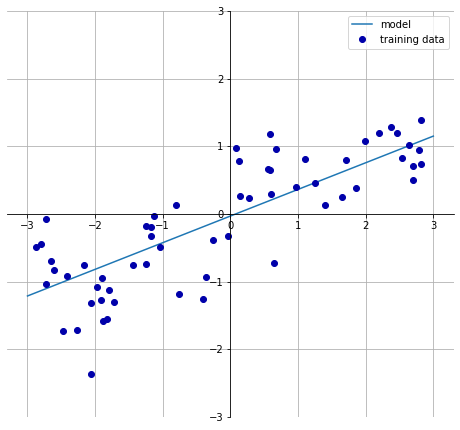

In [13]:
mglearn.plots.plot_linear_regression_wave()

### 2.3.3.2　線形回帰（通常最小二乗法）

In [6]:
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# ()忘れが多いので注意

lr = LinearRegression().fit(X_train, y_train)

In [8]:
print('lr.coef: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))

lr.coef: [0.39390555]
lr.intercept: -0.03180434302675973


In [9]:
print('Training set score: {}'.format(lr.score(X_train, y_train)))
print('Test set score: {}'.format(lr.score(X_test, y_test)))

Training set score: 0.6700890315075756
Test set score: 0.6593368596863701


In [11]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
lr = LinearRegression().fit(X_train, y_train)

In [17]:
# 決定係数
print('Train set score: {}'.format(lr.score(X_train, y_train)))
print('Test set score: {}'.format(lr.score(X_test, y_test)))

Train set score: 0.9520519609032729
Test set score: 0.6074721959665842


訓練データにfitしすぎて、未知データに適合できてない　→ （訓練データの）過学習が起こっている

### 2.3.3.3　リッジ回帰

In [16]:
ridge = Ridge().fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


In [18]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [19]:
# alpha=10で図2-1の左の方、alpha=0.1で真ん中くらいまできた
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.885796658517094
Test set score: 0.7527683481744752


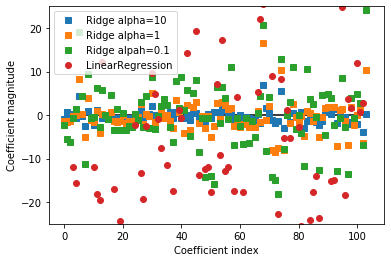

In [20]:
plt.plot(ridge10.coef_, 's', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 's', label='Ridge alpah=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)

plt.legend()

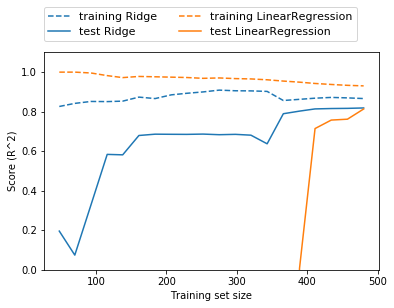

In [21]:
mglearn.plots.plot_ridge_n_samples()

### 2.3.3.4　Lasso回帰

In [22]:
lasso = Lasso().fit(X_train, y_train)

print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [23]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Traing set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso001.coef_ != 0)))

Traing set score: 0.90
Test set score: 0.77
Number of features used: 33


In [24]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used: {}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

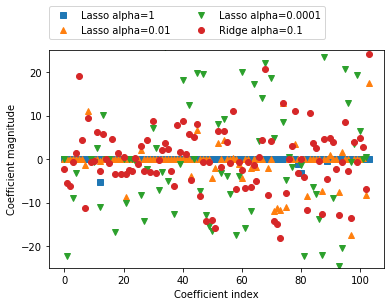

In [25]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

### 2.3.3.5　線形モデルのクラス分類

In [27]:
X, y = mglearn.datasets.make_forge()

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


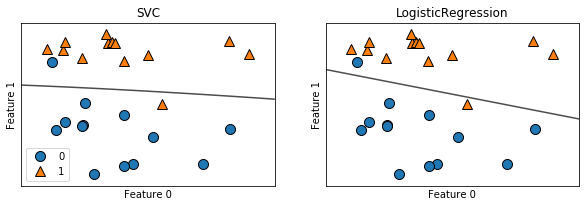

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([SVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    # _が2つ繋がっている
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

axes[0].legend()

個々の係数を小さくするということは、なめらかな曲線、すなわち単調なモデル（訓練データにもテストデータにも良くfit）となる。

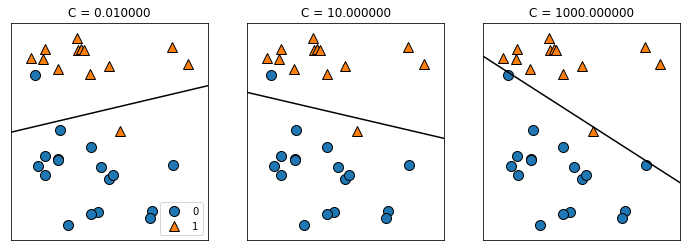

In [30]:
mglearn.plots.plot_linear_svc_regularization()

In [31]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Train set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Train set score: 0.955
Test set score: 0.958


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


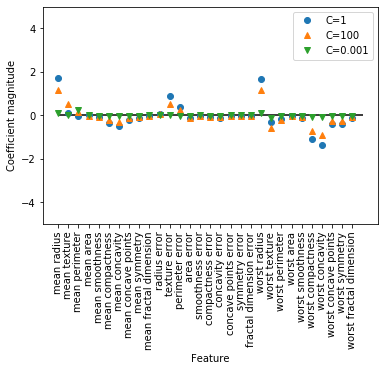

In [34]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.legend()

Traning accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Traning accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Traning accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


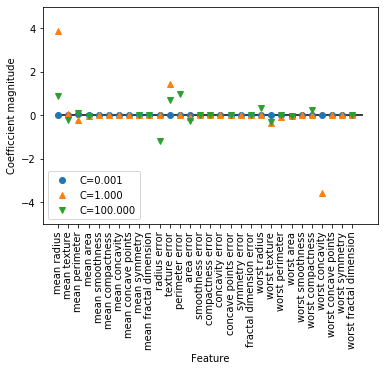

In [35]:
# plt.plot をこのインデントに入れ忘れていたために、エラーが続いた
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty='l1').fit(X_train, y_train)
    print('Traning accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy of l1 logreg with C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficcient magnitude')

plt.ylim(-5, 5)
plt.legend(loc=3)

### 2.3.3.6　線形モデルによる多クラス分類

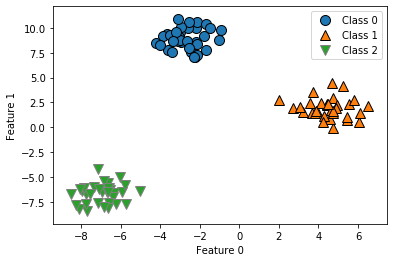

In [37]:
# y で色をつけている（区別をしている）
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [38]:
linear_svm = LinearSVC().fit(X, y)

print('Coefficient shape:', linear_svm.coef_.shape)
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


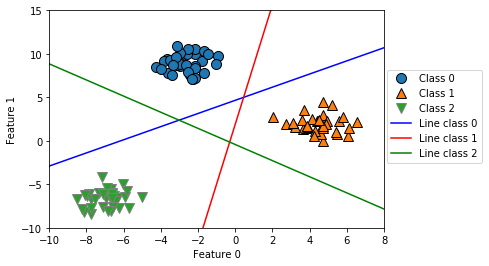

In [39]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

1対その他を分ける直線（分類器）が3つあるから、傾きと切片は3つある（傾きは特徴量が2つ）

Text(0, 0.5, 'Feature 1')

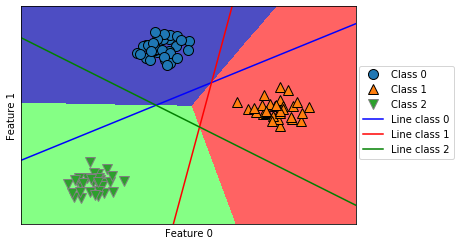

In [40]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

中心部はクラス分類確信度が高い（一番近い直線）に対応するクラスに分類される